In [2]:
from functions import get_finance_data
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
sc = StandardScaler()

In [39]:
df = get_finance_data('BBAS3.SA', )
# df['Close_d1'] = df['Close'].shift(1)
df = df.reset_index()[['Open', 'High', 'Low', 'Close', 'Volume',]]
df['dias'] = df.index.values 
df.dropna(inplace=True)
sc.fit(df)
scaled_df = sc.transform(df)

X = scaled_df[:,-1]
y = scaled_df[:,3]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [42]:
regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=True, activation="linear"))
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [43]:
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_train)
y_predict_test = regressor.predict(X_test)

7/7 [==============================] - 0s 0s/step - loss: 2.8546


<AxesSubplot:>

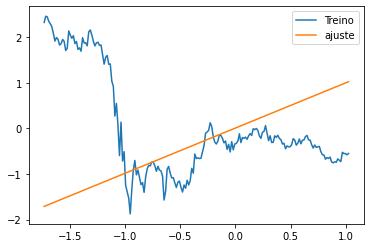

In [44]:
sns.lineplot(x=X_train, y=y_train, label='Treino')
sns.lineplot(x=X_train, y=y_predict[:,0], label='ajuste')

In [26]:
y_predict_test

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)